In [1]:
import pandas as pd 

In [16]:
data_ads = pd.read_csv('/Users/Ethan/Desktop/Python Data Science/python-ml-course/datasets/ads/Advertising.csv')

In [3]:
data_ads

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
import numpy as np

In [5]:
data_ads['corrn'] = (data_ads['TV'] - np.mean(data_ads['TV'])) * (data_ads['Sales'] - np.mean(data_ads['Sales']))

In [7]:
data_ads

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,699.040956
196,94.2,4.9,8.1,9.7,228.411706
197,177.0,9.3,6.4,12.8,-36.623044
198,283.6,42.0,66.2,25.5,1567.338706


In [8]:
data_ads['corr1'] = (data_ads['TV'] - np.mean(data_ads['TV']))**2

In [9]:
data_ads

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,699.040956,11846.689806
196,94.2,4.9,8.1,9.7,228.411706,2792.329806
197,177.0,9.3,6.4,12.8,-36.623044,897.451806
198,283.6,42.0,66.2,25.5,1567.338706,18647.950806


In [10]:
data_ads['corr2'] = (data_ads['Sales'] - np.mean(data_ads['Sales']))**2

In [11]:
data_ads

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006
...,...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,699.040956,11846.689806,41.248506
196,94.2,4.9,8.1,9.7,228.411706,2792.329806,18.684006
197,177.0,9.3,6.4,12.8,-36.623044,897.451806,1.494506
198,283.6,42.0,66.2,25.5,1567.338706,18647.950806,131.733006


In [12]:
corr_pearson = sum(data_ads['corrn']) / np.sqrt(sum(data_ads['corr1']) * sum(data_ads['corr2']))

In [13]:
corr_pearson

0.782224424861606

In [14]:
def cof_coerr(df,var1,var2):
    df['corrn'] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    df['corr1'] = (df[var1] - np.mean(df[var1]))**2
    df['corr2'] = (df[var2] - np.mean(df[var2]))**2
    corr_pearson = sum(df['corrn']) / np.sqrt(sum(df['corr1']) * sum(df['corr2']))
    
    return corr_pearson

In [15]:
cof_coerr(data_ads,'TV', 'Sales')

0.782224424861606

In [17]:
cols = data_ads.columns.values

In [18]:
for x in cols:
    for y in cols:
        print(x + ', ' + y + ': ' + str(cof_coerr(data_ads,x,y)))

TV, TV: 1.0
TV, Radio: 0.05480866446583009
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
Radio, TV: 0.05480866446583009
Radio, Radio: 1.0
Radio, Newspaper: 0.3541037507611752
Radio, Sales: 0.5762225745710553
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.3541037507611752
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616525
Sales, TV: 0.782224424861606
Sales, Radio: 0.5762225745710553
Sales, Newspaper: 0.22829902637616525
Sales, Sales: 1.0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sn

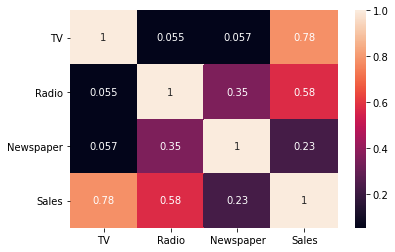

In [36]:
data_ads = pd.read_csv('/Users/Ethan/Desktop/Python Data Science/python-ml-course/datasets/ads/Advertising.csv')
data_ads = data_ads.select_dtypes(include=['float64','int']) 
corr_matrix = data_ads.corr(method = 'pearson') 
sn.heatmap(corr_matrix, annot = True) 
plt.show()

Text(0.5, 1.0, 'Gasto en TV vs Ventas del producto')

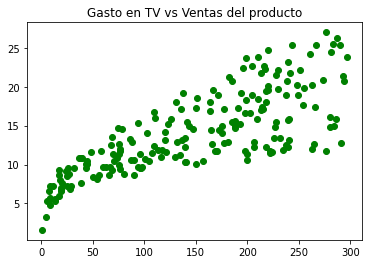

In [28]:
plt.plot(data_ads['TV'], data_ads['Sales'], 'go')
plt.title('Gasto en TV vs Ventas del producto')

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del producto')

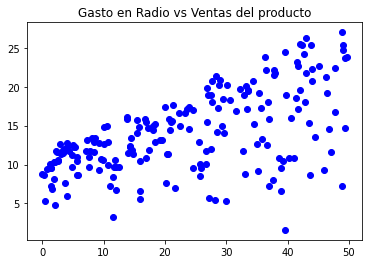

In [32]:
plt.plot(data_ads['Radio'], data_ads['Sales'], 'bo')
plt.title('Gasto en Radio vs Ventas del producto')

Text(0.5, 1.0, 'Gasto en Periódico vs Ventas del producto')

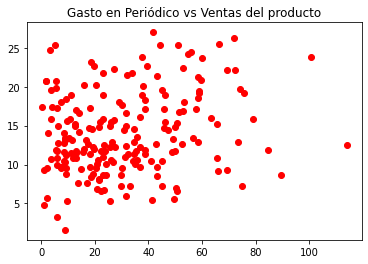

In [27]:
plt.plot(data_ads['Newspaper'], data_ads['Sales'], 'ro')
plt.title('Gasto en Periódico vs Ventas del producto')

In [34]:
data_ads = pd.read_csv('/Users/Ethan/Desktop/Python Data Science/python-ml-course/datasets/ads/Advertising.csv')
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


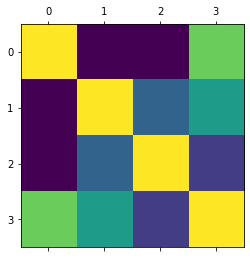

In [35]:
plt.matshow(data_ads.corr())